Kornpob Bhirombhakdi

kbhirombhakdi@stsci.edu

# Description
This Notebook shows how to use hstgrism.background.Background class to help with background estimation.

Background performs 2D polynomial fitting by using polynomial2d.Polynomial2D class (pip install polynomial2d); also, polynomial2d calls rescalex package (pip install rescalex).

From earlier steps, we produced cutout.fits, mask.fits, and cutflat.fits using other classes provided in hstgrism. We will use these files in this Notebook.

# Quick Walkthrough
- Specify Container object.
- Read grism data, object mask, and flatfield.
- Perform flatfield.
- Specify norder and sigclip for the background estimation.
- Instantiate Background object, and estimate for the background.
- Save outputs.
- Last, we demonstrate an diagnostic plot calling through hstgrism.show_sum1d.show_sum1d function.


In [1]:
from hstgrism.container import Container
from hstgrism.background import Background
from hstgrism.show_sum1d import show_sum1d
from astropy.io import fits
import copy

In [2]:
saveprefix = 'testprefix'
savefolder = 'testfolder'
plotformat = 'pdf'
overwrite = False

container_params = {'saveprefix':saveprefix,
                    'savefolder':savefolder,
                    'plotformat':plotformat,
                    'overwrite':overwrite
                   }
containerobj = Container(**container_params)


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder testfolder already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)


In [3]:
gfile = ('./testfolder/testprefix_cutout.fits',1)
ffile = ('./testfolder/testprefix_cutflat.fits',1)
mfile = ('./testfolder/testprefix_mask.fits',1)

gdata = fits.open(gfile[0])[gfile[1]].data / fits.open(ffile[0])[ffile[1]].data
mdata = fits.open(mfile[0])[mfile[1]].data.astype(bool)
norder = 0
sigclip=(True, 5, 1.)

bkgobj = Background(gdata=gdata,norder=norder,mdata=mdata,sigclip=sigclip,container=containerobj)
bkgobj.poly2d.fit()
bkgobj.save(do_yfit=True,do_maskfit=True)


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/polynomial2d/polynomial2d.py:173: RuntimeWarning: invalid value encountered in greater
  tmpmask = (n_sig > sigma_level) # good data == False


Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,254.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,73.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 1 invalid data points
data_minmax = (-1.757429022930123,187.76333427616157) : scale_minmax = (-1.0,1.0) : method = linear
Rescale = False
Perform fit
Perform compute
Sigma clipping = True, sigma level = 1.0, iter #1
Update maskfit
Perform fit
Perform compute
Sigma clipping = True, sigma level = 1.0, iter #2
Update maskfit
Perform fit
Perform compute
Sigma clipping = True, sigma level = 1.0, iter #3
Update maskfit
Perform fit
Perform compute
Sigma clipping = True, sigma level = 1.0, iter #4
Update maskfit
Perform fit
Perform compute
Sigma clipping = True, sigma level = 1.0, iter #5
Save ./testfolder/testprefix_cutbkg.fits
Save ./testfolder/testprefix_maskfit.fits


Save ./testfolder/testprefix_withMASKFIT_sum1d.pdf


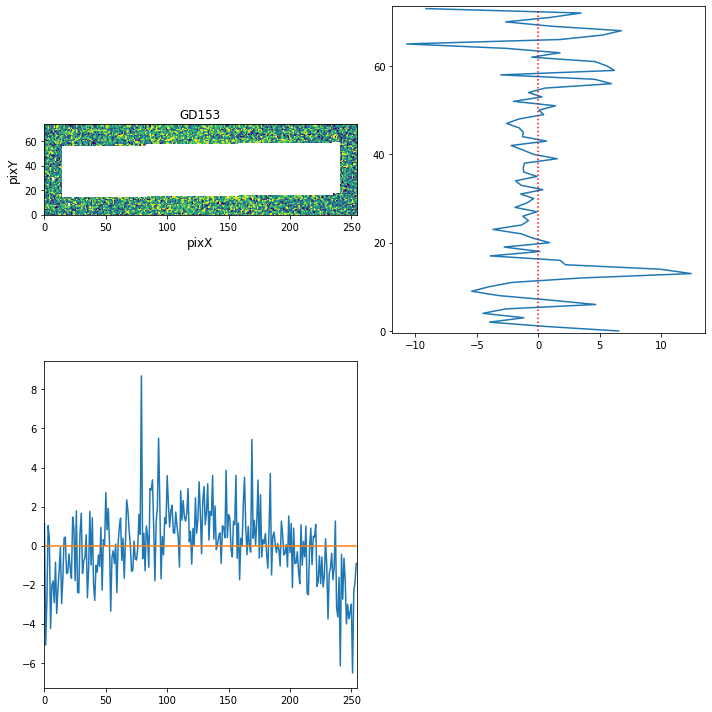

In [4]:
tmpdata = gdata - bkgobj.poly2d.model['YFIT']
tmpcont = copy.deepcopy(containerobj)
tmpcont.data['saveprefix'] += '_withMASKFIT'
show_sum1d(gdata=tmpdata,objname='GD153',mdata=bkgobj.poly2d.model['MASKFIT'],do_zero=True,save=True,container=tmpcont)


Save ./testfolder/testprefix_withoutMASKFIT_sum1d.pdf


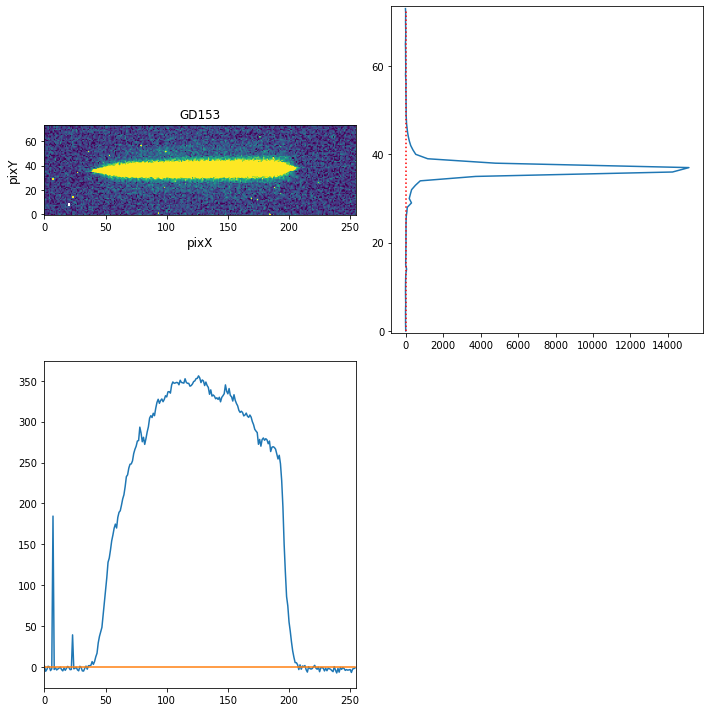

In [5]:
tmpdata = gdata - bkgobj.poly2d.model['YFIT']
tmpcont = copy.deepcopy(containerobj)
tmpcont.data['saveprefix'] += '_withoutMASKFIT'
show_sum1d(gdata=tmpdata,objname='GD153',mdata=None,do_zero=True,save=True,container=tmpcont)
